In [1]:
import pandas

Question = pandas.read_sql('Question', "sqlite:///QAT_final.db", index_col='index')


In [2]:
import datetime
def one_day(x):
    date = datetime.datetime.fromtimestamp(x['CreationDate_to_datetime'])
    return datetime.datetime(2011,1,1,date.hour,date.minute,date.second,date.microsecond)
Question['CreationDate_to_daytime'] = Question.apply(one_day, axis=1)

In [37]:
def func(x):
    date = datetime.datetime.fromtimestamp(x['BestAnsTime']-x['CreationDate_to_datetime'])
    return datetime.datetime(date.year,date.month,date.day,date.hour,date.minute,date.second,date.microsecond)
    #return x['BestAnsTime']-x['CreationDate_to_datetime']
Question['BestAnsTimeResponseTime'] = Question.apply(func, axis=1)

def func(x):
    '''date = datetime.datetime.fromtimestamp(x['BestAnsTime']-x['CreationDate_to_datetime'])
    return datetime.datetime(date.year,date.month,date.day,date.hour,date.minute,date.second,date.microsecond)'''
    return x['BestAnsTime']-x['CreationDate_to_datetime']
Question['BestAnsTimeResponseTime_timestamp'] = Question.apply(func, axis=1)

Question_no_outlier = Question[Question['BestAnsTimeResponseTime_timestamp'] >= 0]


In [78]:
def func1(x):
    '''date = datetime.datetime.fromtimestamp(x['BestAnsTime']-x['CreationDate_to_datetime'])
    return datetime.datetime(date.year,date.month,date.day,date.hour,date.minute,date.second,date.microsecond)'''
    out = x['CreationDate_to_daytime']
    out = out.hour*60*60+out.minute*60+out.second
    return out
Question_no_outlier['CreationDate_to_daytime_timestamp'] = Question_no_outlier.apply(func1, axis=1)
Question_no_outlier.to_sql('Question_no_outlier', "sqlite:///QAT_final.db", if_exists='replace')

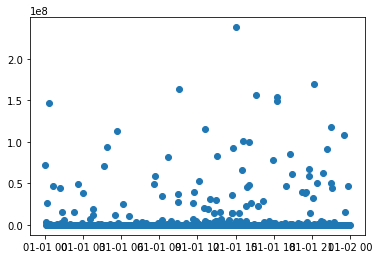

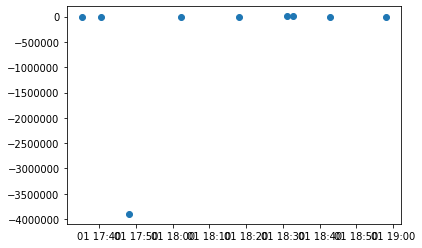

In [65]:
import matplotlib.pyplot as plt, matplotlib

#dates = matplotlib.dates.date2num(Question['BestAnsTimeResponseTime'])
plt.plot_date(Question_no_outlier['CreationDate_to_daytime'][:1000],Question_no_outlier['BestAnsTimeResponseTime_timestamp'][:1000])
plt.show()
plt.plot_date(Question['CreationDate_to_daytime'][:1000],Question['BestAnsTimeResponseTime_timestamp'][:1000])
plt.show()

In [83]:
one_day = 60*60*24
one_bin = 60*60
bins = list(range(0,one_day+one_bin,one_bin))
hours = list(range(0,24,1))

Question_no_outlier['CreationDate_to_daytime_bin'] = pandas.cut(Question_no_outlier['CreationDate_to_daytime_timestamp'], bins=bins, labels=hours)

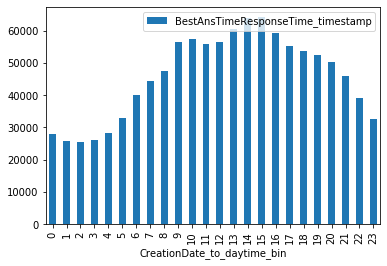

In [89]:
hist = Question_no_outlier[['CreationDate_to_daytime_bin','BestAnsTimeResponseTime_timestamp']].groupby('CreationDate_to_daytime_bin').count()
hist.plot(kind='bar')

plt.show()

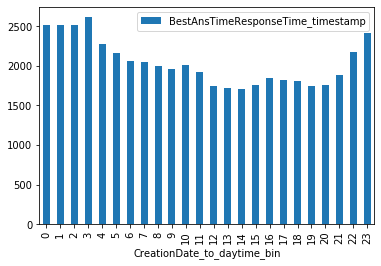

In [90]:
hist = Question_no_outlier[['CreationDate_to_daytime_bin','BestAnsTimeResponseTime_timestamp']].groupby('CreationDate_to_daytime_bin').median()
hist.plot(kind='bar')
plt.show()

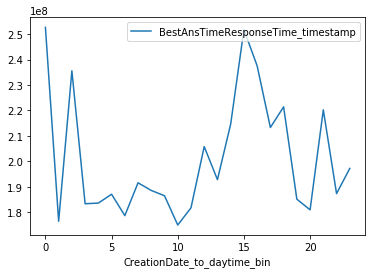

In [93]:
hist = Question_no_outlier[['CreationDate_to_daytime_bin','BestAnsTimeResponseTime_timestamp']].groupby('CreationDate_to_daytime_bin').max()
hist.plot()
plt.show()